Convirtiendo A a numpy array.
Convirtiendo b a numpy array.
Convirtiendo A a numpy array.
Convirtiendo b a numpy array.
i= 0 x: [[0. 0.]]
Solucion Jacobi:  [[5.00003355]
 [2.00001342]]
Trayectoria Jacobi:  26


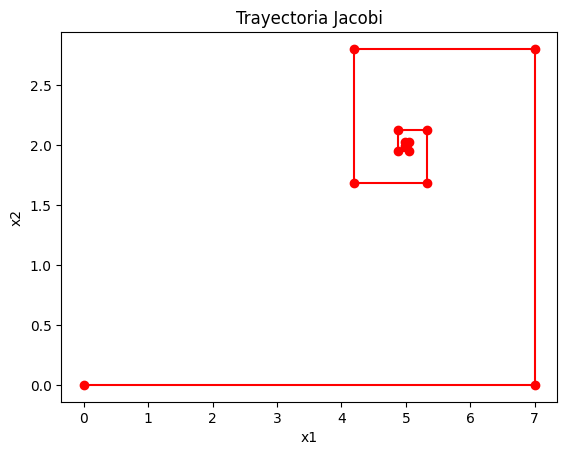

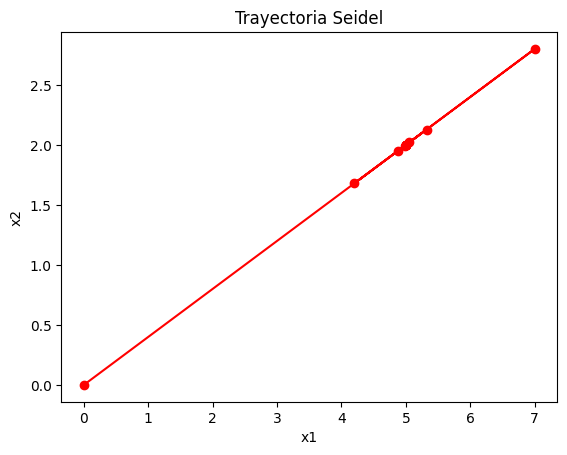

Convirtiendo A a numpy array.
Convirtiendo b a numpy array.
Convirtiendo A a numpy array.
Convirtiendo b a numpy array.
i= 0 x: [[1. 1.]]
Solucion Jacobi:  [[4.99993289]
 [1.99998322]]
Trayectoria Jacobi:  24


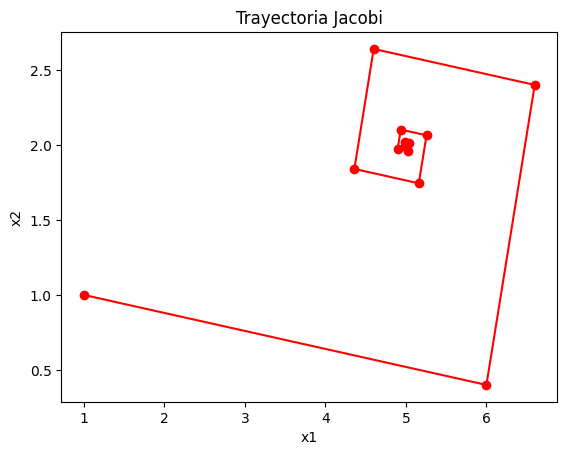

Text(0.5, 1.0, 'Trayectoria Seidel')

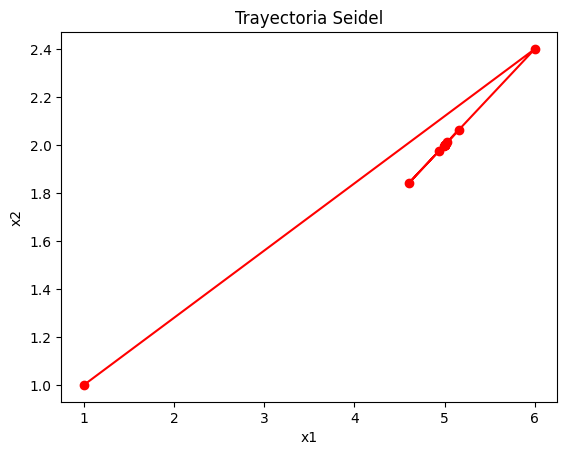

In [3]:

import numpy as np
import matplotlib.pyplot as plt
trayectoria=[]
trayectoria1=[]
def gauss_jacobi(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi y guarda la trayectoria.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        print("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        print("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()

    #print(f"i= {0} x: {x.T}")
    trayectoria.append(x)
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]
           
        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()
        trayectoria.append(x)
        #print(f"i= {k} x: {x.T}")
        


    return x

def gauss_seidel(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        print("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        print("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    trayectoria1.append(x)
    print(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()
        trayectoria1.append(x)
        #print(f"i= {k} x: {x.T}")

    return x




A=[[1,1],
   [-2,5]]
b=[7,0]
AproxInicial=[0,0]
tolerancia=0.0001
maxIter=100
solucionJacobi=gauss_jacobi(A=A,b=b,x0=AproxInicial,tol=tolerancia,max_iter=maxIter)
solucionSeidel=gauss_seidel(A=A,b=b,x0=AproxInicial,tol=tolerancia,max_iter=maxIter)

print("Solucion Jacobi: ",solucionJacobi)
print("Trayectoria Jacobi: ",len(trayectoria))

# Grafica trayectoria Gauss Jacobi
x1 = [x[0] for x in trayectoria]
x2 = [x[1] for x in trayectoria]
plt.plot(x1, x2, 'ro-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectoria Jacobi')
plt.show()

#Gracica trayectoria Gauss Seidel
x1 = [x[0] for x in trayectoria1]
x2 = [x[1] for x in trayectoria1]
plt.plot(x1, x2, 'ro-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectoria Seidel')
plt.show()

trayectoria=[]
trayectoria1=[]
AproxInicial=[1,1]
solucionJacobi=gauss_jacobi(A=A,b=b,x0=AproxInicial,tol=tolerancia,max_iter=maxIter)
solucionSeidel=gauss_seidel(A=A,b=b,x0=AproxInicial,tol=tolerancia,max_iter=maxIter)

print("Solucion Jacobi: ",solucionJacobi)
print("Trayectoria Jacobi: ",len(trayectoria))

# Grafica trayectoria Gauss Jacobi x0=[1,1]
x1 = [x[0] for x in trayectoria]
x2 = [x[1] for x in trayectoria]
plt.plot(x1, x2, 'ro-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectoria Jacobi')
plt.show()

#Gracica trayectoria Gauss Seidel x0=[1,1]
x1 = [x[0] for x in trayectoria1]
x2 = [x[1] for x in trayectoria1]
plt.plot(x1, x2, 'ro-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectoria Seidel')




Convirtiendo A a numpy array.
Convirtiendo b a numpy array.
Convirtiendo A a numpy array.
Convirtiendo b a numpy array.
i= 0 x: [[0. 0.]]
Solucion Jacobi:  [[-2.25179981e+15]
 [ 2.25179981e+15]]
Solucion Seidel:  [[1.2676506e+30]
 [2.5353012e+30]]
Trayectoria Jacobi:  100


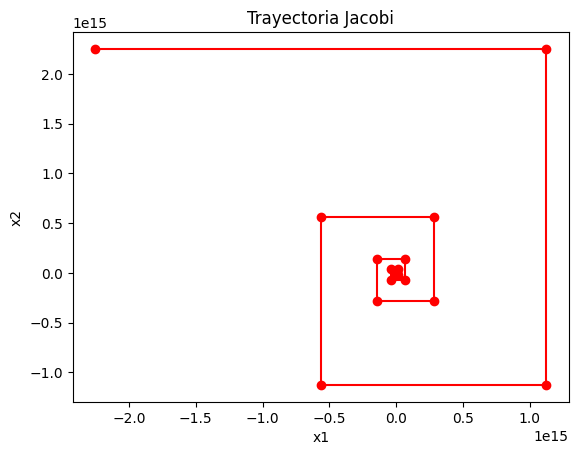

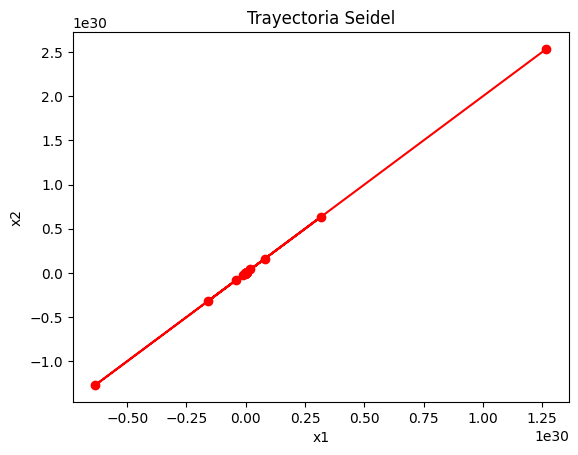

In [4]:
A=[[1,1],
   [-2,1]]
b=[6,0]
AproxInicial=[0,0]
tolerancia=0.0001
maxIter=100
trayectoria=[]
trayectoria1=[]

solucionJacobi=gauss_jacobi(A=A,b=b,x0=AproxInicial,tol=tolerancia,max_iter=maxIter)
solucionSeidel=gauss_seidel(A=A,b=b,x0=AproxInicial,tol=tolerancia,max_iter=maxIter)

print("Solucion Jacobi: ",solucionJacobi)
print("Solucion Seidel: ",solucionSeidel)
print("Trayectoria Jacobi: ",len(trayectoria))

# Grafica trayectoria Gauss Jacobi
x1 = [x[0] for x in trayectoria]
x2 = [x[1] for x in trayectoria]
plt.plot(x1, x2, 'ro-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectoria Jacobi')
plt.show()

#Gracica trayectoria Gauss Seidel
x1 = [x[0] for x in trayectoria1]
x2 = [x[1] for x in trayectoria1]
plt.plot(x1, x2, 'ro-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectoria Seidel')
plt.show()



### Cambios realizados 
* Se comento los debug para una salida limpia de las graficas
* Se guardo en dos variables las trayectorias de cada iteracion de ambos metodos
* El segundo sitema si tiene solucion siendo x1=2,x2=4, sin embargo, la matriz no tiene dominancia estricta por filas y por esta razon ambos metodos fallan al encontrar la solucion.
* Las graficas que describen se centran en 0 siendo este el valor al que converge pero no es la solucion.